In [1]:
from IPython.display import Image

## model-base vs. model-free

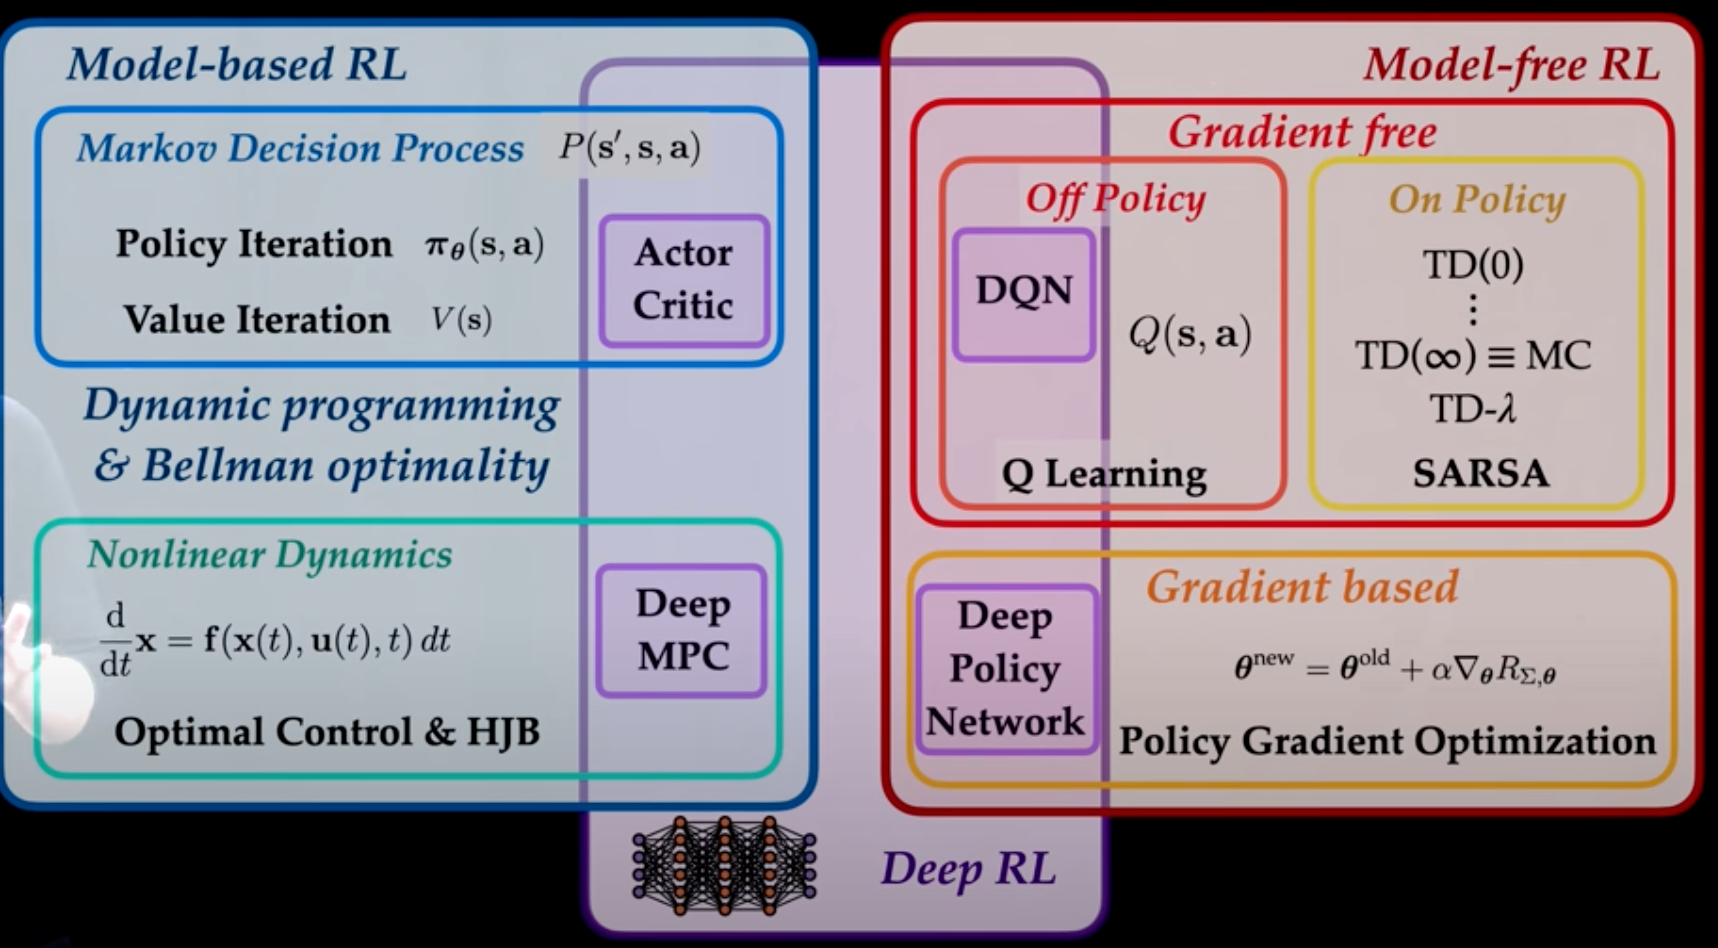

In [4]:
Image('../../imgs/model-base-model-free.png', width=600)

- planning vs. learning
    - model-base planning
    - model-free learning
- model-based
    - policy iteration
    - value iteration
    - dynamic progamming

## value based vs. policy based

- Value based
    - Value: $V_\pi(s)=\mathbb E\left(\sum_t \gamma^tr_t|s_0=s\right)$
    - value iteration
- Policy based
    - Policy $\pi(s,a)=Pr(A=a|S=s)$
    - Policy gradient

$$
\begin{split}
P(s,a,s')&=Pr(s_{t+1}=s'|s_t=s,a_t=a)\\
R(s,a,s')&=Pr(r_{t+1}|s_t=s,a_t=a,s_{t+1}=s')
\end{split}
$$

- 可以简单将 $P(s,a,s')$ 的形式理解为 MDP (markov decision process)；

### optimize Policy to maximize future rewards

- value function：$V_\pi(s)=\mathbb E\left(\sum_{t}\gamma^tr_t|s_0=s\right)$
    - $V(s)=\max_{\pi}\mathbb E\left(\sum_{t}\gamma^tr_t|s_0=s\right)$
    - $V(s)=\max_{\pi}\mathbb E\left(r_0+\sum_{t=1}\gamma^tr_t|s_1=s'\right)$
    - $V(s)=\max_{\pi}\mathbb E\left(r_0+\gamma V(s')\right)$： Bellman's Equation，也叫 Bellman's optimiality condition
        - 这里（recursive expression，期望形式）就是 Bellman's Equation，也叫 Bellman's optimiality condition
            - we calculate the value as the sum of **immediate reward** + the discounted value of **the state that follows**.
            - 当前时刻 $V(s)$，next timestamp $V(s')$，这样在编程上就把问题逐步拆分了更小的子问题
        - https://huggingface.co/learn/deep-rl-course/unit2/bellman-equation
        
        - $\pi = \arg\max_\pi\mathbb E\left(r_0+\gamma V(s')\right)$

- https://medium.com/harder-choices/dynamic-programming-in-python-reinforcement-learning-bb288d95288f
- https://github.com/jknthn/learning-rl/blob/master/dynamic-programming.ipynb

### value iteration

- $V(s)=\max_{\pi}\mathbb E\left(r_0+\gamma V(s')\right)=\max_a\sum_{s'}P(s'|s,a)\left(R(s,a,s')+\gamma V(s')\right)$
    - 对于右边的等式，外层是 $\max_a$ 也就是遍历所有的 $a$ 求最大的 $\sum_{s'}$，内层 $\sum_{s'}$ 也就是 given ($a, s$) 的情况下遍历所有的 $s'$ 求和
    - $\pi(s,a)=\arg\max_a\sum_{s'}P(s'|s,a)\left(R(s,a,s')+\gamma V(s')\right)$

### policy iteration

$$
\begin{split}
&V_\pi(s)&=\mathbb E\left(R(s,\pi(s),s')+\gamma V(s')\right)\\
&&=\sum_{s'}P(s'|s,\pi(s))\left(R(s,\pi(s),s')+\gamma V_\pi(s')\right)\\
&\pi(s)&=\arg\max_a\mathbb E\left(R(s,\pi(s),s')+\gamma V_\pi(s')\right)
\end{split}
$$

- typically converges in fewer iterations

### quality function

- $Q(s,a)$ = quality of state/action pair

$$
\begin{split}
Q(s,a)&=\mathbb E\left(R(s,a,s')+\gamma V(s')\right)\\
&=\sum_{s'}P(s'|s,a)\left(R(s,a,s')+\gamma V(s')\right)\\
V(s)&=\max_aQ(s,a)\\
\pi(s,a)&=\arg\max_aQ(s,a)
\end{split}
$$

## $V(s)$ 与 $Q(s,a)$


- reference
    - https://lilianweng.github.io/posts/2018-04-08-policy-gradient/

- $V(s)$: State-value function
    - $V(s)$: State-value function measures the expected return of state $s$ 
    - $V_w(s)$: is a value function parameterized by $w$
    - $V^\pi(s)$: The value of state $s$ when we follow a policy $\pi$
        $$
        V^\pi (s) = \mathbb{E}_{a\sim \pi} [G_t \vert S_t = s]
        $$
        - $G_t=\sum_{k=0}\gamma^kR_{t+k+1}=R_{t+1}+\gamma R_{t+2}+\gamma^2R_{t+3}+\cdots$

- $Q(s,a)$: Action-value function, but it assesses the expected return of a pair of state and action $(s,a)$;
    - $Q_w(\cdot)$: is a action value function parameterized by $w$
    - $Q^{\pi}(s,a)$: $Q^\pi(s, a) = \mathbb{E}_{a\sim \pi} [G_t \vert S_t = s, A_t = a]$

- $A(s,a)=Q(s,a)-V(s)$, Advantage function, 